In [1]:
import os
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!git clone https://github.com/hunglc007/tensorflow-yolov4-tflite.git

Cloning into 'tensorflow-yolov4-tflite'...
remote: Enumerating objects: 780, done.
remote: Total 780 (delta 0), reused 0 (delta 0), pack-reused 780
Receiving objects: 100% (780/780), 197.64 MiB | 31.98 MiB/s, done.
Resolving deltas: 100% (370/370), done.


In [4]:
!cp '/content/gdrive/MyDrive/IA3/Face_detection/cfg/pesos2/yolov4-tiny_final.weights' '/content/'

In [5]:
!mv '/content/yolov4-tiny_final.weights' '/content/tensorflow-yolov4-tflite/data/'

In [6]:
%cd tensorflow-yolov4-tflite

/content/tensorflow-yolov4-tflite


In [7]:
# @title coco.names
%%writefile coco.names
face

Writing coco.names


In [8]:
!mv coco.names data/classes/

In [11]:
!python save_model.py --weights ./data/yolov4-tiny_final.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --tiny
# Save tf model for tflite converting
# !python save_model.py --weights ./data/yolov4-tiny_final.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --tiny --framework tflite


2021-06-19 22:41:53.048606: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-19 22:41:54.215702: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-19 22:41:54.243322: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-19 22:41:54.243925: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-19 22:41:54.243967: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-19 22:41:54.246309: I tensorflow/stream_executor/platform/default

In [12]:
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-416 --output ./checkpoints/yolov4-tiny-416-fp16.tflite --quantize_mode float16

2021-06-19 22:44:18.807668: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-19 22:44:19.978091: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-19 22:44:20.005936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-19 22:44:20.006576: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-19 22:44:20.006626: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-19 22:44:20.009133: I tensorflow/stream_executor/platform/default

In [ ]:
!python detect.py --weights ./checkpoints/yolov4-tiny-416 --size 416 --model yolov4 --image ./data/girl.png --tiny

2021-06-09 19:35:33.761762: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-09 19:35:34.917335: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-06-09 19:35:34.944650: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-09 19:35:34.945254: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-06-09 19:35:34.945298: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-06-09 19:35:34.947769: I tensorflow/stream_executor/platform/default

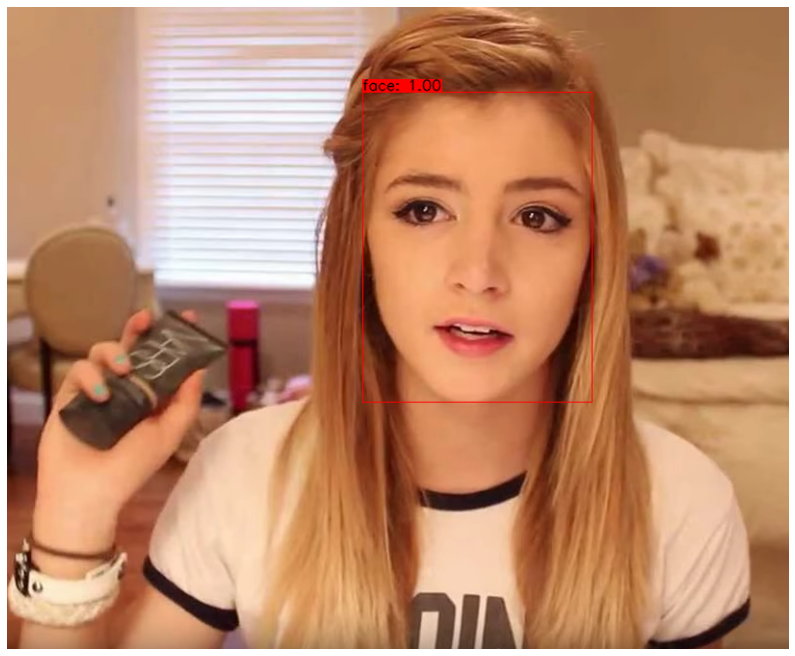

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
image = plt.imread('/content/tensorflow-yolov4-tflite/result.png')

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
!cp -R './checkpoints/yolov4-tiny-416' '/content/gdrive/MyDrive/Colab Notebooks'